In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
uploaded = files.upload()
df = pd.read_csv("/content/matches - matches.csv")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [5]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
players=df["player_of_match"].unique()
player=""
number=0
for i in players:
    if number<np.size(np.where((df["player_of_match"]==i) & ((df["season"]>=2010) & (df["season"]<=2015)) & (df["city"]=="Mumbai"))):
        number=np.size(np.where((df["player_of_match"]==i) & ((df["season"]>=2010) & (df["season"]<=2015)) & (df["city"]=="Mumbai")))
        player=i
player

'KA Pollard'

In [6]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
teams=df["team1"].append(df["team2"]).unique()
teams
team=""
wins=0
for i in teams:
    x=len(df[(df["win_by_runs"]>50) & ((df["team1"]==i) | (df["team2"]==i))])
    if wins<x:
        wins=x
        team=i
team

'Royal Challengers Bangalore'

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]
def compare(team1,team2):
    win1=0
    win2=0
    df_new=df[((df["team1"]==team1) & (df["team2"]==team2)) | ((df["team1"]==team2) & (df["team2"]==team1))]
    win1=len(df_new[df_new["winner"]==team1])
    win2=len(df_new[df_new["winner"]==team2])
    print(team1,"won",win1,"matches and",team2,"won",win2,"matches")

In [8]:
compare("Kolkata Knight Riders","Royal Challengers Bangalore")

Kolkata Knight Riders won 11 matches and Royal Challengers Bangalore won 9 matches


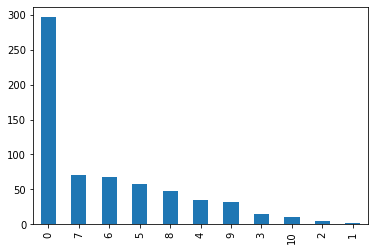

In [11]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]
import matplotlib.pyplot as plt
#plt.bar(df["win_by_wickets"].value_counts(),df["win_by_wickets"])
df["win_by_wickets"].value_counts().plot(kind="bar")
plt.show()

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 
def win_percent(team):
    wins=len(df[(df["toss_winner"]==team) & (df["winner"]==team)])
    played=len(df[(df["toss_winner"]==team)])
    print("Win percentage of",team,"after wining the toss=",(wins/played*100),"%")

In [10]:
win_percent("Mumbai Indians")

Win percentage of Mumbai Indians after wining the toss= 56.470588235294116 %
